In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from sklearn.datasets import fetch_openml
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from scipy.stats import multivariate_normal as mvn

In [4]:
class GaussBayes():
  def fit(self, X, y, epsilon=1e-3):
    self.likelihoods = dict()
    self.priors = dict()
    #only ints in classes and getting structured set
    self.K = set(y.astype(int))

    for k in self.K:
      X_k=X[y==k]
      N_k, D = X_k.shape
      mu_k = X_k.mean(axis=0)
      self.likelihoods[k] = {"mean": mu_k, "cov": (1/(N_k-1)) * np.matmul((X_k-mu_k).T, X_k-mu_k)+epsilon*np.identity(D)}
      self.priors[k] = len(X_k)/len(X)

  def predict(self, X):
      N, D = X.shape
      P_hat = np.zeros((N, len(self.K)))

      for k , l in self.likelihoods.items():
        P_hat[:,k] = mvn.logpdf(X, l["mean"],l["cov"]) + np.log(self.priors[k])

      return P_hat.argmax(axis = 1)


In [5]:
def ConfusionMatrix(y_actual,y_predicted):
  plt.figure(figsize=(10,7))
  y_actu = pd.Series(y_actual, name='Actual')
  y_pred = pd.Series(y_predicted, name='Predicted')
  cm = pd.crosstab(y_actu, y_pred)
  ax = sns.heatmap(cm, annot=True, fmt="d")
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  return cm

In [6]:
def accuracy(y,y_hat):
  return np.mean(y==y_hat)

In [7]:
gbays = GaussBayes()

In [8]:
# Load CSV data
train_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/MNIST_train.csv")
test_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/MNIST_test.csv - MNIST_test.csv.csv")

# Features start at column 3
X_train = train_df.iloc[:, 3:].values.astype(float)
X_test  = test_df.iloc[:, 3:].values.astype(float)

# ✅ FIX: labels must be 1-D int array
y_train = train_df.iloc[:, 2].values.astype(int)
y_test  = test_df.iloc[:, 2].values.astype(int)

# Normalize
X_train /= 255.0
X_test  /= 255.0

print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

gbays.fit(X_train, y_train)


X_train: (60000, 784)
y_train: (60000,)
X_test: (10000, 784)
y_test: (10000,)


Model Accuracy: 91.08%


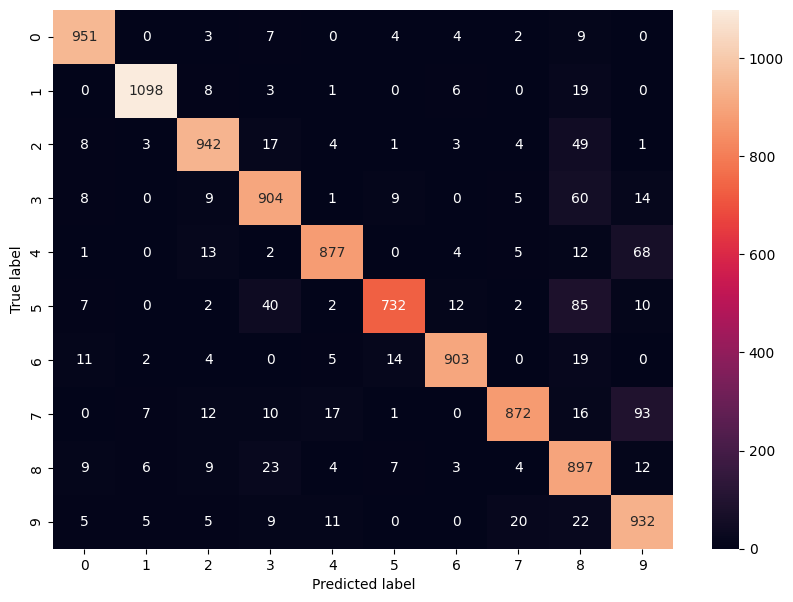

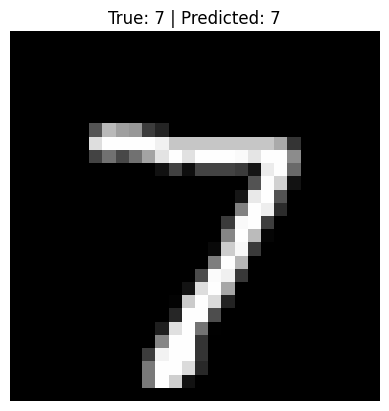

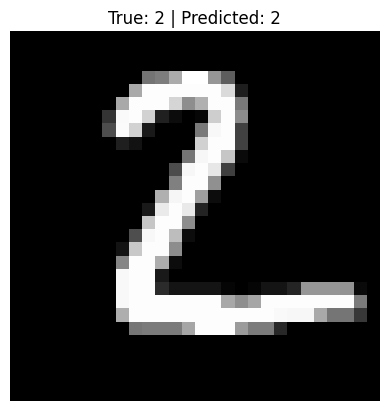

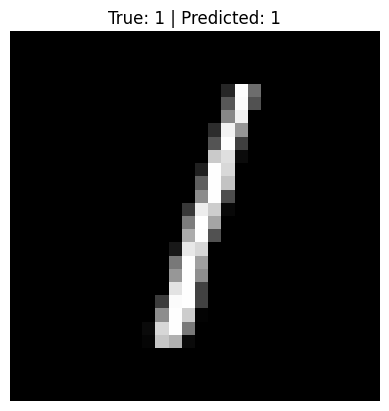

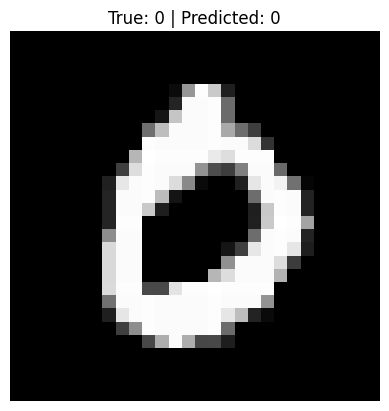

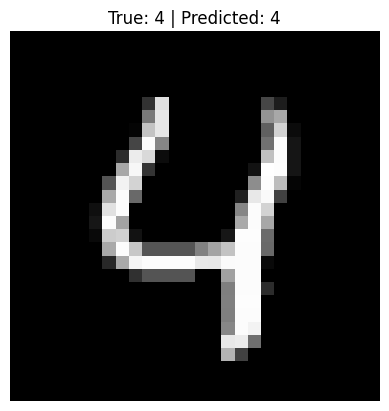

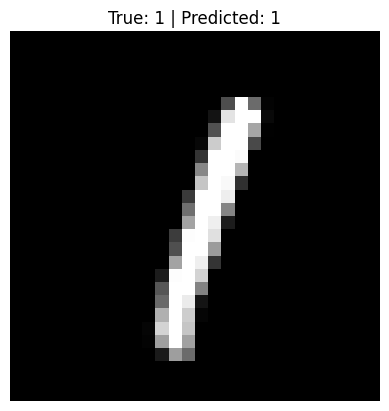

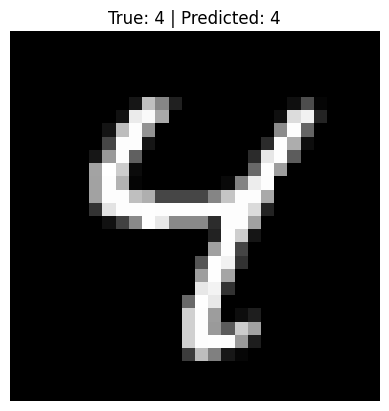

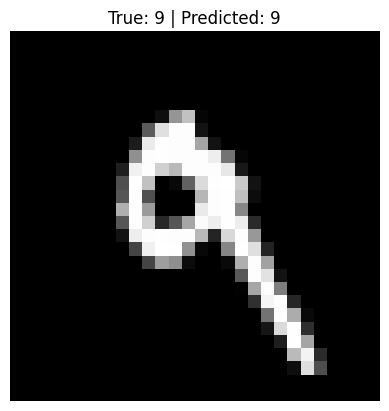

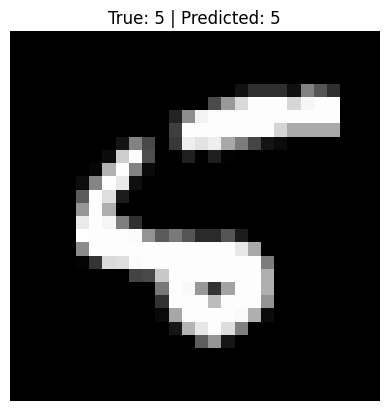

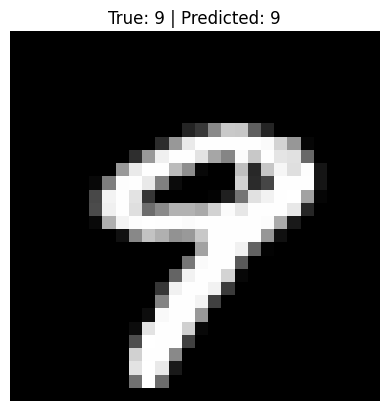

In [9]:
# Predict
# y_hat_bayes=gbays.predict(X_train)

y_pred = gbays.predict(X_test)

# Evaluate
print("Model Accuracy: {:.2f}%".format(accuracy(y_test, y_pred) * 100))
# print("\nClassification Report:\n", classification_report(y_test, y_pred))

# # Confusion Matrix
cm = ConfusionMatrix(y_test, y_pred)
plt.show()

# Visualize some predictions
#converted xtest to numpy so no longer has .iloc
for i in range(10):
    img = np.array(X_test[i]).reshape(28, 28)
    plt.imshow(img, cmap='gray')
    plt.title(f"True: {y_test[i]} | Predicted: {y_pred[i]}")
    plt.axis('off')
    plt.show()